In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [13]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6484 - accuracy: 0.8380 - val_loss: 0.3560 - val_accuracy: 0.9016
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3388 - accuracy: 0.9057 - val_loss: 0.2928 - val_accuracy: 0.9193
Epoch 3/11
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2914 - accuracy: 0.9181 - val_loss: 0.2610 - val_accuracy: 0.9273
Epoch 4/11
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2616 - accuracy: 0.9260 - val_loss: 0.2395 - val_accuracy: 0.9319
Epoch 5/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2385 - accuracy: 0.9331 - val_loss: 0.2199 - val_accuracy: 0.9386
Epoch 6/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2193 - accuracy: 0.9388 - val_loss: 0.2066 - val_accuracy: 0.9407
Epoch 7/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2030 - accuracy: 0.9431 - val_loss: 0.1927 - val_accur

In [14]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9549
Loss=0.154
Accuracy=0.955


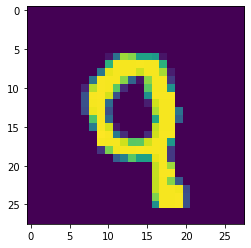

313/313 [==============================] - 1s 3ms/step


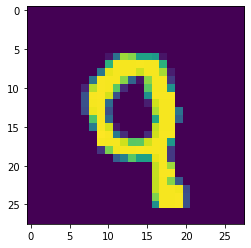

In [19]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [20]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [7.8966750e-06 7.8560782e-07 5.3741725e-04 1.1777529e-05 1.9600457e-03
 1.9280851e-05 6.7383062e-06 7.1986360e-03 4.4345745e-04 9.8981398e-01]


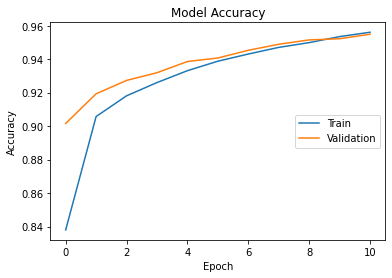

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

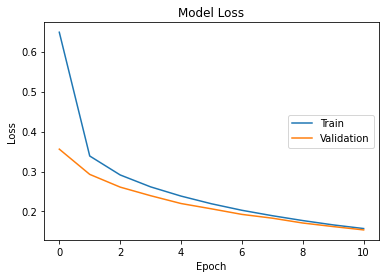

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()